Import the libraries necesary for this model.

In [3]:
#import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Import the data file into a dataframe and examine the features of the dataframe. 

In [4]:
#load the csv file into a dataframe
forest_info = pd.read_csv('covtype.csv')

In [5]:
#print out top rows examine what is in the dataframe
forest_info.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [6]:
# check for null values, and if there is anything that has to be hot encoded
forest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
# find the number of values and columns
forest_info.shape

(581012, 55)

In [8]:
# determine the values in the cover type column as that is the target variable
forest_info['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

Condense tree types 2, 3, 4, 5, 6, and 7 into a single class to fix the class imbalance and create a binary classification problem. 

In [9]:
# there is a large class imbalance. to fix this, change data to a binary classfication problem
# wil determine if tree type is type 2 (Lodgepole Pine) or not, so change all other types to 0 value
forest_info['Cover_Type'].replace(to_replace = 1, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 3, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 7, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 6, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 5, value = 0, inplace=True)
forest_info['Cover_Type'].replace(to_replace = 4, value = 0, inplace=True)

In [10]:
forest_info['Cover_Type'].value_counts()

0    297711
2    283301
Name: Cover_Type, dtype: int64

In [11]:
# for clarification, change type 2 tree (Lodgepole Pine) to be represented as type 1
forest_info['Cover_Type'].replace(to_replace = 2, value = 1, inplace=True)

In [12]:
forest_info['Cover_Type'].value_counts()

0    297711
1    283301
Name: Cover_Type, dtype: int64

Define X and y fetaures and split data into test and train sets. 

In [13]:
# data is now properly preprocessed, now we will define X and y features
X = forest_info.drop('Cover_Type', axis=1)
y = forest_info['Cover_Type']

In [14]:
# create am 80/20 split for the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

train a basic model of the decision tree. 

In [15]:
# create a decision tree calssifier using entropy, then fit the the clasifier to the training data
DTC = DecisionTreeClassifier(criterion = 'entropy')
DT_model = DTC.fit(X_train, y_train)

In [16]:
# use the trained decision tree to make predictions of the type of tree
predict_y = DTC.predict(X_test)

create a confusion matrix to determine the true positives and true negatives, also determine the evaluation metrics. 

In [17]:
# create a confusion matrix to determine the number of true positives, true negatives, false positives, and false negatives
cm = (confusion_matrix(y_test, predict_y))
print(cm)

[[57157  2626]
 [ 2623 53797]]


In [18]:
# number of true positives are 53,795
# number of true negavites are 57,139
# number of false positives are 2,644
# number of false negatives are 2,625

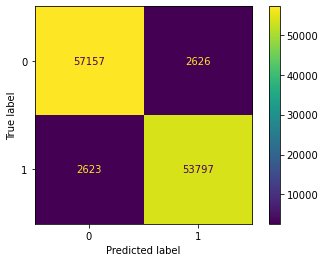

In [19]:
plot_confusion_matrix(DT_model, X_test, y_test)

In [20]:
# calculate accuracy of the prediction
accuracy = accuracy_score(y_test, predict_y)
print('Accuracy is :{0}'.format(accuracy))

Accuracy is :0.954829049163963


In [21]:
precision = precision_score(y_test, predict_y)
print('Precision is :{0}'.format(precision))

Precision is :0.9534586959218758


In [22]:
recall = recall_score(y_test, predict_y)
print('Recall is :{0}'.format(recall))

Recall is :0.9535093938319745


In [23]:
F1 = f1_score(y_test, predict_y)
print('F1 is :{0}'.format(F1))

F1 is :0.9534840442030077


Tune hyperparamters to find which will create the best model. 

In [32]:
# tune hyperparameters starting with max depth
depth = np.arange(30,50)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))


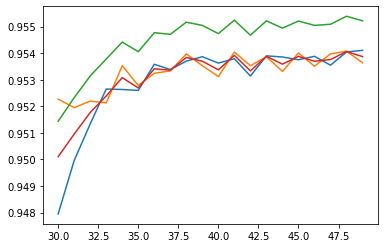

In [36]:
plt.plot(depth, precision)
plt.plot(depth, recall)
plt.plot(depth, accuracy)
plt.plot(depth, F1)

In [47]:
sample_split = np.arange(1,10)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

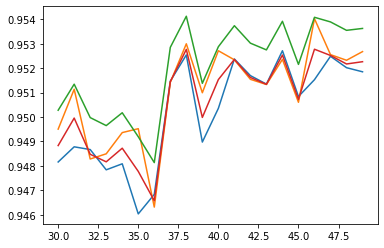

In [46]:
plt.plot(depth, precision)
plt.plot(depth, recall)
plt.plot(depth, accuracy)
plt.plot(depth, F1)

In [40]:
sample_leaf = np.arange(1,10)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

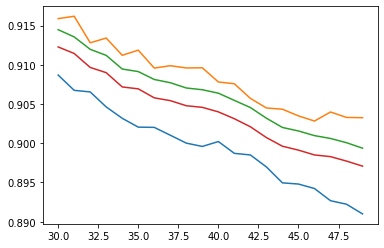

In [41]:
plt.plot(depth, precision)
plt.plot(depth, recall)
plt.plot(depth, accuracy)
plt.plot(depth, F1)

In [44]:
features = np.arange(1,20)
precision = []
recall = []
accuracy = []
F1 = []
for n in depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_features = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))

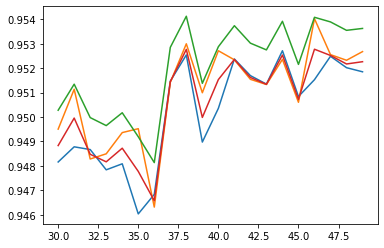

In [45]:
plt.plot(depth, precision)
plt.plot(depth, recall)
plt.plot(depth, accuracy)
plt.plot(depth, F1)

In [ ]:
 DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = 48, max_features = n)
    DT_model = DTC.fit(X_train, y_train)
    predict_y = DTC.predict(X_test)
    precision.append(precision_score(y_test, predict_y))
    recall.append(recall_score(y_test, predict_y))
    accuracy.append(accuracy_score(y_test, predict_y))
    F1.append(f1_score(y_test, predict_y))